# EDA Analysis and Visualization of COVID-19 Data

This exercesice aims at answering two questions by using Data about COVID-19 posted by Our World in Data website. These questions are:

1. Plot two separate charts of infected people and deaths in Spain (separately)
2. Plot Top-10 countries bar charts with number of infection cases and deaths (separately)

Data Source: https://ourworldindata.org/coronavirus-source-data

* **NOTE**: In order to provide an up to date version of data, we will be importing the data from the link provided in Our World in Data website under the European Centre for Disease Prevention and Control (ECDC) section. Following the recommendations provided in OWD website, we decided to relly on those data in order to analyse the daily global and national statistics. 

## First steps: Importing and describing Data

In [1]:
# Import the necessary libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset:

df = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv', parse_dates=["date"])
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
11049,2020-04-11,Zimbabwe,0,0,11,3
11050,2020-04-12,Zimbabwe,3,0,14,3
11051,2020-04-13,Zimbabwe,0,0,14,3
11052,2020-04-14,Zimbabwe,3,0,17,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 6 columns):
date            11054 non-null datetime64[ns]
location        11054 non-null object
new_cases       11054 non-null int64
new_deaths      11054 non-null int64
total_cases     11054 non-null int64
total_deaths    11054 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 518.3+ KB


In [4]:
df.set_index("date")

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...
2020-04-11,Zimbabwe,0,0,11,3
2020-04-12,Zimbabwe,3,0,14,3
2020-04-13,Zimbabwe,0,0,14,3


### Analysing variables:

From this first step we can see that the file is a Time Series dataset containing data of the evolution of certain variables related to COVID-19 spread in different countries. After inspecting the variables, we set the column 'Date' as index. Let's examine the variables:

- **date**: Date of the observation taken, ranging from 2019/12/31 to the last day the dataset has been updated. Date formar _(yyyy-mm-dd)_.
- **location**: List of countries with available data, plus global data under the location _'World'_
- **new_cases**: amount of new cases reported on that date
- **new_deaths**: amount of new deaths reported on that date
- **total_cases**: total cases since the start of the outbreak
- **total_deaths**: total deaths since the start of the outbreak

Let's see what's going on with missing values:

## 1. Spain: Infections and Deaths


First, let's filter data related to Spain and set the column 'date' as the Index.

In [5]:
df_spain = df[df.location == "Spain"].set_index("date")
df_spain


,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Spain,0,0,0,0
2020-01-01,Spain,0,0,0,0
2020-01-02,Spain,0,0,0,0
2020-01-03,Spain,0,0,0,0
2020-01-04,Spain,0,0,0,0
...,...,...,...,...,...
2020-04-11,Spain,4576,605,157022,15843
2020-04-12,Spain,4830,510,161852,16353
2020-04-13,Spain,4167,619,166019,16972


#### Checking for missing values in subset and observing data:

Doing a quick check we can see there are no _null_ values, and the amount of observations are complete.

In [6]:
df_spain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2019-12-31 to 2020-04-15
Data columns (total 5 columns):
location        107 non-null object
new_cases       107 non-null int64
new_deaths      107 non-null int64
total_cases     107 non-null int64
total_deaths    107 non-null int64
dtypes: int64(4), object(1)
memory usage: 5.0+ KB


### Curve of Daily New Cases in Spain

We will first plot the curve of _New Cases_ in order to see the evolution of the virus spread since the beginning of the outbreak.

In the chart bellow, the  _**blue line**_ represents the beginning of the Official measures to control spread put in place on March 16th.

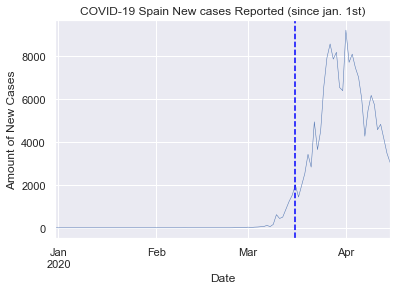

In [7]:
sns.set(rc={'figure.figsize':(6, 4)})

df_spain['new_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain New cases Reported (since jan. 1st)')
plt.xlabel('Date')
plt.ylabel('Amount of New Cases')
plt.axvline('2020-03-16', color='blue', linestyle='--')

plt.show()


### Total Cases in Spain

The charts bellow show the curves of Total Cases reported in Spain, both in linear and logarithmic scale since the beginning of the outbreak. Again, the _**red line**_ indicates the day the first measures to contain the outbreak entered into force at National level.

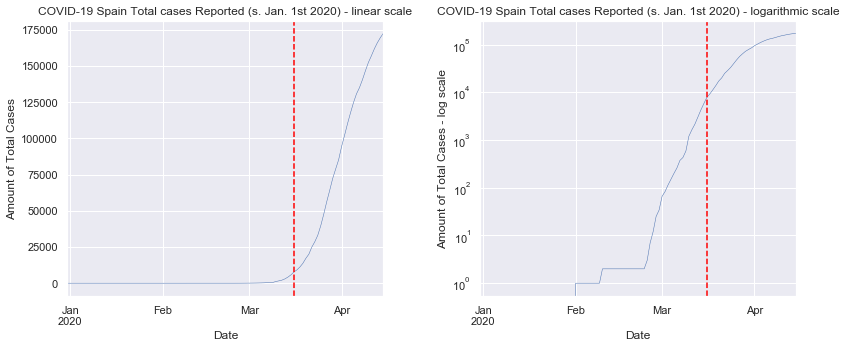

In [8]:
sns.set(rc={'figure.figsize':(12, 5)})

plt.subplot(1, 2, 1)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (s. Jan. 1st 2020) - linear scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases')
plt.axvline('2020-03-16', color='red', linestyle='--')

plt.subplot(1, 2, 2)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (s. Jan. 1st 2020) - logarithmic scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases - log scale')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.yscale('log')

plt.tight_layout()
plt.show()

### Total Deaths in Spain

The charts bellow show the curves of Total Deaths reported in Spain, both in linear and logarithmic scale since the beginning of the outbreak. Again, the _**red line**_ indicates the day the first measures to contain the outbreak entered into force at National level.

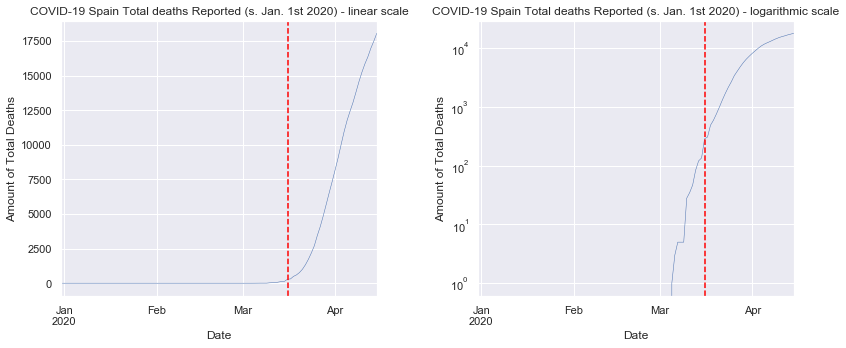

In [9]:
sns.set(rc={'figure.figsize':(12, 5)})

plt.subplot(1, 2, 1)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (s. Jan. 1st 2020) - linear scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')

plt.subplot(1, 2, 2)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (s. Jan. 1st 2020) - logarithmic scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.yscale('log')

plt.tight_layout()
plt.show()

## 2. World: Top-10 countries in terms of Infections and Deaths


The second part of the exercise consists in plotting the Top-10 countries in terms of Total Cases reported and Total Deaths. For that purpose, we will need to group by 'location', so that we can then sum the variables to plot in each case. As the set of data includes one observation which sums up all data under the 'location' 'World', we decided to drop that value. One variation could have been to also plot that value, for comparison purposes. 

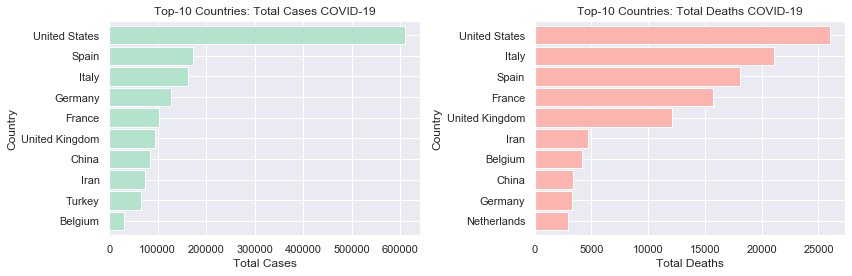

In [10]:
sns.set(rc={'figure.figsize':(12, 4)})

plt.subplot(1, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(10)
top_ten_total_cases.plot(kind='barh', width=0.9, cmap='Pastel2')
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Top-10 Countries: Total Cases COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(10)
top_ten_total_deaths.plot(kind='barh', width=0.9, cmap='Pastel1')
plt.ylabel('Country')
plt.xlabel('Total Deaths')
plt.title('Top-10 Countries: Total Deaths COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

### 2.b. World: Top-10 countries Infections and Deaths per Population 


Many more variables can be taken into account in the analysis. As an example, we decided to include Population and show the data in terms of Total Cases and Total Deaths *per 10.000 Population*.


For that purpose, we used an up to date population dataset published in: https://raw.githubusercontent.com/rafikahmed/worldometers/master/population_dataset.csv. 

In [11]:
## Importing data and setting the thousands delimitation to avoid importing data as string.

world_population = pd.read_csv('https://raw.githubusercontent.com/rafikahmed/worldometers/master/population_dataset.csv', thousands=',')
world_population.head()

,country_name,year,population
0,China,2019,1420062022
1,China,2018,1415045928
2,China,2017,1409517397
3,China,2016,1403500365
4,China,2015,1397028553


In [12]:
## Create a mask to filter data for the last available year, i.e. 2019.

mask_2019 = world_population['year'] == 2019
world_population_2019 = world_population[mask_2019]
world_population_2019.head()

,country_name,year,population
0,China,2019,1420062022
17,Spain,2019,46441049
34,Iraq,2019,40412299
48,Colombia,2019,49849818
55,Algeria,2019,42679018


In [13]:
## Change 'country_name' column name to 'location', as in main data frame. Drop the column 'year'.

world_population_2019_new = world_population_2019.rename(columns={'country_name': 'location'}).drop(['year'], axis = 1) 
world_population_2019_new = world_population_2019_new.set_index('location')
world_population_2019_new.head()

,population
location,
China,1420062022
Spain,46441049
Iraq,40412299
Colombia,49849818
Algeria,42679018


Once the World population data frame is ready, has the columns that we need with the appropriate format and name, we are now ready to merge it with the Total Cases and Total Deaths data. We will then add a new calculated column 'per 10.000 Population'.


In order to make results easier to visualize, we decided to set the scale to cases and deaths per 10.000 population, instead of per capita. 

In [14]:
## Merging the datasets with an inner merge, in the column 'location'.
## Adding a new calculated column 'per capita permil'

total_deaths_pop = pd.merge(list_total_deaths, world_population_2019_new, on='location', how='inner')
total_deaths_pop['deaths_pcap_permil'] = total_deaths_pop['new_deaths'] / (total_deaths_pop['population'] / 10000)
total_deaths_pop.head()

,new_deaths,population,deaths_pcap_permil
location,,,
United States,26057,329093110,0.791782
Italy,21069,59216525,3.557960
Spain,18056,46441049,3.887940
France,15729,65480710,2.402081
United Kingdom,12107,66959016,1.808121


In [15]:
total_cases_pop = pd.merge(list_total_cases, world_population_2019_new, on='location', how='inner')
total_cases_pop['cases_pcap_permil'] = total_cases_pop['new_cases'] / (total_cases_pop['population'] / 10000)
total_cases_pop.head()

,new_cases,population,cases_pcap_permil
location,,,
United States,609516,329093110,18.521081
Spain,172541,46441049,37.152692
Italy,162488,59216525,27.439638
Germany,127584,82438639,15.476238
France,103573,65480710,15.817330


#### Plotting Per 10.000 Population results

In order to compare the absolute figures with those calculated *per 10.000 Population*, we will plot it in a 4x4 grid.


On the left, we can see both total cases and total deaths in absolute terms, while on the right we can also see total cases and total deaths but this time expressed in terms of cases and deaths per 10.000 Population. As we can see, results this time show a different Top-10 countries list.


* Top-10 Countries in Total Cases per 10.000 Population: this lists contains most of the smaller teritories in Europe with smaller population. On the so called *"bigger countries"* Spain is at that date (April 12th), the country with the biggest amount of reported cases, followed by Switzerland and Italy.
* Top-10 Countries in Total Deaths per 10.000 Population: in this list we can see that some of the *"smaller countries"* are no longer in the list. San Marino and Andorra are the two countried at the head of both lists, but in this case Spain and Italy follow in third and fourth position.
* The United Stated, which is at the top both in cases and deaths in absolute terms, is not in the Top-10 list neither in Cases nor deaths per 10.000 Population. Similarly which on April 12th was still in the Top-10 countries in absolute terms, does not apper in the list per 10.000 Population.

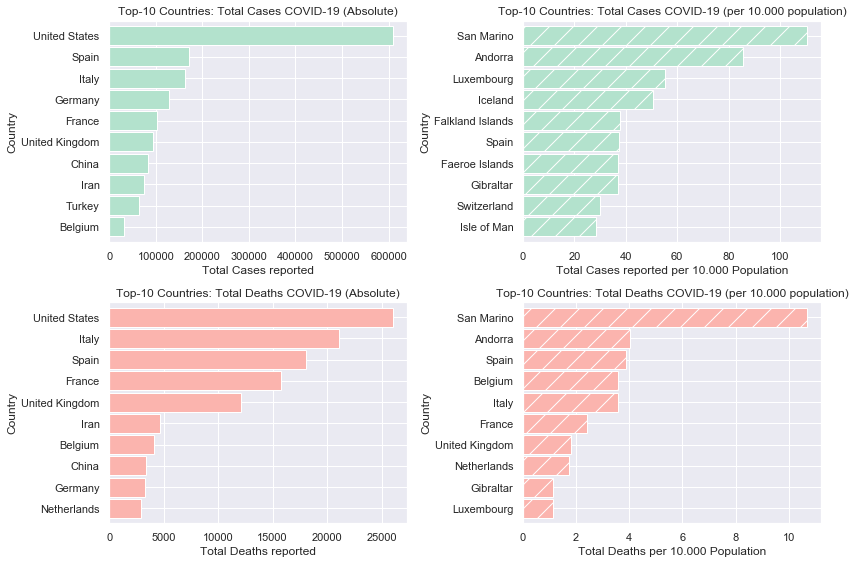

In [16]:
sns.set(rc={'figure.figsize':(12, 8)})

plt.subplot(2, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(10)
top_ten_total_cases.plot(kind='barh', width=0.9, cmap='Pastel2')
plt.ylabel('Country')
plt.xlabel('Total Cases reported')
plt.title('Top-10 Countries: Total Cases COVID-19 (Absolute)', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 3)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(10)
top_ten_total_deaths.plot(kind='barh', width=0.9, cmap='Pastel1')
plt.ylabel('Country')
plt.xlabel('Total Deaths reported')
plt.title('Top-10 Countries: Total Deaths COVID-19 (Absolute)', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)

list_total_cases_pcap = total_cases_pop['cases_pcap_permil'].sort_values(ascending=False)
top_ten_total_cases_pcap = list_total_cases_pcap.head(10)
top_ten_total_cases_pcap.plot(kind='barh', width=0.9, cmap='Pastel2', hatch='/')
plt.ylabel('Country')
plt.xlabel('Total Cases reported per 10.000 Population')
plt.title('Top-10 Countries: Total Cases COVID-19 (per 10.000 population)', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 4)

list_total_deaths_pcap = total_deaths_pop['deaths_pcap_permil'].sort_values(ascending=False)
top_ten_total_deaths_pcap = list_total_deaths_pcap.head(10)
top_ten_total_deaths_pcap.plot(kind='barh', width=0.9, cmap='Pastel1', hatch='/')
plt.ylabel('Country')
plt.xlabel('Total Deaths per 10.000 Population')
plt.title('Top-10 Countries: Total Deaths COVID-19 (per 10.000 population)', fontsize=12)
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

### 2.c. World: Top-30 countries Infections and Deaths per Population 

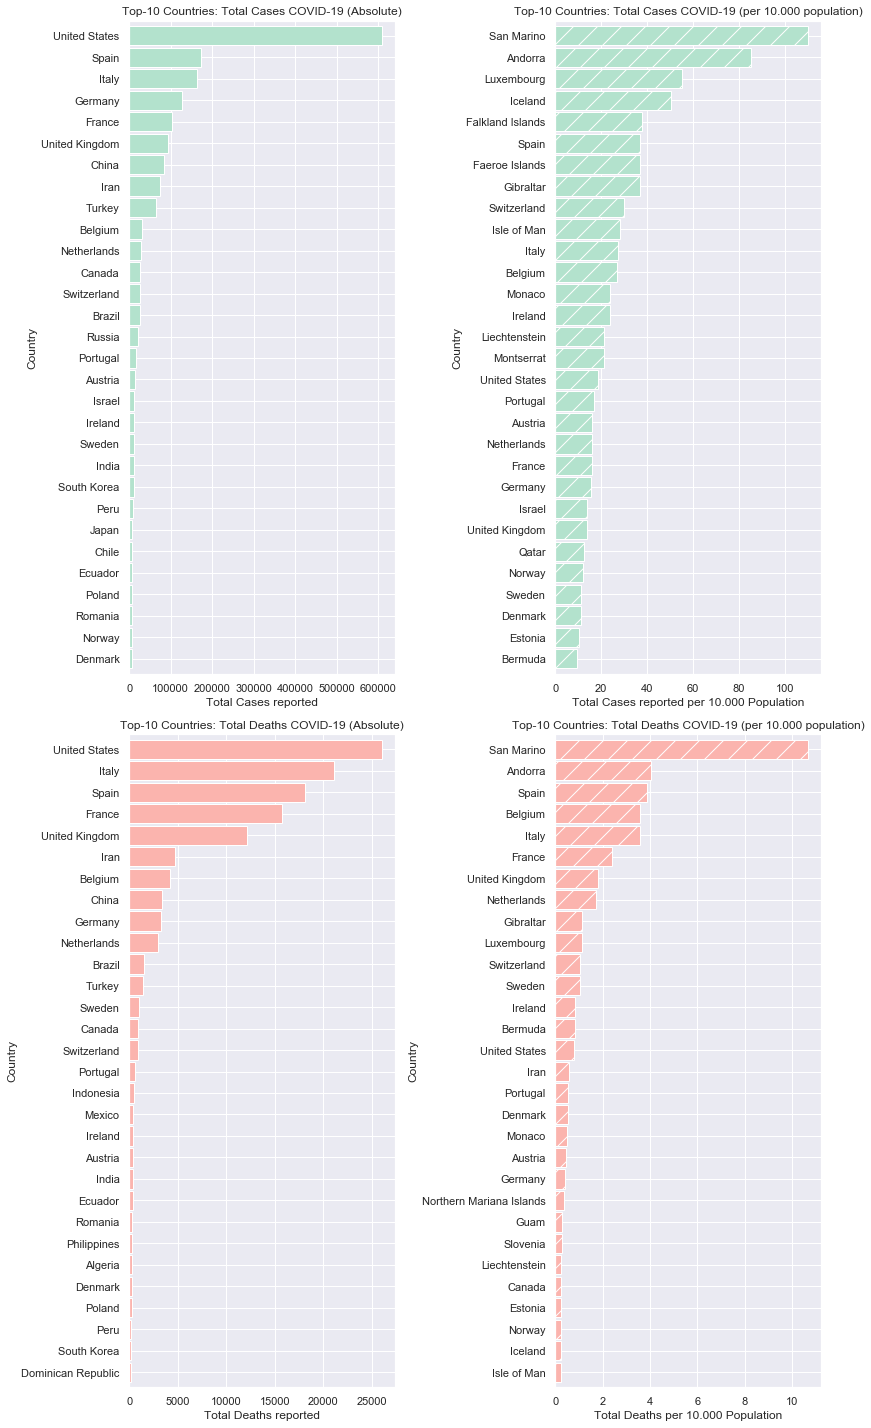

In [19]:
sns.set(rc={'figure.figsize':(12, 20)})

plt.subplot(2, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(30)
top_ten_total_cases.plot(kind='barh', width=0.9, cmap='Pastel2')
plt.ylabel('Country')
plt.xlabel('Total Cases reported')
plt.title('Top-10 Countries: Total Cases COVID-19 (Absolute)', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 3)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(30)
top_ten_total_deaths.plot(kind='barh', width=0.9, cmap='Pastel1')
plt.ylabel('Country')
plt.xlabel('Total Deaths reported')
plt.title('Top-10 Countries: Total Deaths COVID-19 (Absolute)', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)

list_total_cases_pcap = total_cases_pop['cases_pcap_permil'].sort_values(ascending=False)
top_ten_total_cases_pcap = list_total_cases_pcap.head(30)
top_ten_total_cases_pcap.plot(kind='barh', width=0.9, cmap='Pastel2', hatch='/')
plt.ylabel('Country')
plt.xlabel('Total Cases reported per 10.000 Population')
plt.title('Top-10 Countries: Total Cases COVID-19 (per 10.000 population)', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 4)

list_total_deaths_pcap = total_deaths_pop['deaths_pcap_permil'].sort_values(ascending=False)
top_ten_total_deaths_pcap = list_total_deaths_pcap.head(30)
top_ten_total_deaths_pcap.plot(kind='barh', width=0.9, cmap='Pastel1', hatch='/')
plt.ylabel('Country')
plt.xlabel('Total Deaths per 10.000 Population')
plt.title('Top-10 Countries: Total Deaths COVID-19 (per 10.000 population)', fontsize=12)
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

### 2.d. Comparing big blocks of population: EU, US and China 

In [ ]:
# Creating a list with EU countries

eu_list = ["Italy", "Germany", "France", "Spain", "Sweden", "Netherlands", "Poland", "Romania", "Greece", "Ireland", "Denmark", "Portugal", "Belgium", "Czechia", "Austria", "Bulgaria", "Hungary", "Croatia", "Finland", "Luxembourg", "Malta", "Lithuania", "Cyprus", "Slovakia", "Slovenia", "Estonia", "Latvia"]

In [43]:
# Function to display data frames side by side:

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [44]:
# EU Total cases and Total deaths

eu_deaths_pop = total_deaths_pop[total_deaths_pop.index.isin(eu_list)]
eu_deaths_pop

eu_cases_pop = total_cases_pop[total_cases_pop.index.isin(eu_list)]
eu_cases_pop

display_side_by_side(eu_cases_pop, eu_deaths_pop)

,new_cases,population,cases_pcap_permil
location,,,
Spain,172541,46441049,37.152692
Italy,162488,59216525,27.439638
Germany,127584,82438639,15.476238
France,103573,65480710,15.817330
Belgium,31119,11562784,26.913069
Netherlands,27419,17132908,16.003705
Portugal,17448,10254666,17.014694
Austria,14234,8766201,16.237364
Ireland,11479,4847139,23.682011


In [45]:
total_eu_deaths = eu_deaths_pop.sum()
total_eu_deaths

new_deaths            6.907600e+04
population            4.327918e+08
deaths_pcap_permil    2.159970e+01
dtype: float64

In [46]:
total_eu_cases = eu_cases_pop.sum()
total_eu_cases

new_cases            7.187990e+05
population           4.327918e+08
cases_pcap_permil    3.335863e+02
dtype: float64